# Implementacion de modelo Deep Learning

In [ ]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# INTENTO 1

Divison de Datos en conjunto de entrenamiento y prueba

In [ ]:
train_dir = "/content/drive/MyDrive/face-recognition-dataset/Original Images/Original Images"
# Crear generador de datos
datagen = ImageDataGenerator(
    rescale=1./255,  # Escalar píxeles entre 0 y 1
    validation_split=0.2  # Dividir datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
)
# Generador para datos de entrenamiento
train_ds = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Utilizar conjunto de entrenamiento
)

# Generador para datos de prueba
val_ds = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Utilizar conjunto de prueba
)

classes = list(train_ds.class_indices.keys())

Found 2068 images belonging to 31 classes.
Found 504 images belonging to 31 classes.


Creacion del Modelo

In [ ]:
# Crear el modelo
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(classes), activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 batch_normalization_5 (Bat  (None, 111, 111, 32)      128       
 chNormalization)                                                
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                      

Entrenamiento del Modelo

In [ ]:
# Entrenar el modelo
history = model.fit(train_ds, epochs=30, validation_data=val_ds, verbose=1)

Epoch 1/30
65/65 [==============================] - 52s 726ms/step - loss: 3.4766 - accuracy: 0.0919 - val_loss: 4.0820 - val_accuracy: 0.0278
Epoch 2/30
65/65 [==============================] - 54s 834ms/step - loss: 2.6711 - accuracy: 0.2524 - val_loss: 5.3472 - val_accuracy: 0.0278
Epoch 3/30
65/65 [==============================] - 49s 761ms/step - loss: 2.1322 - accuracy: 0.3728 - val_loss: 5.6695 - val_accuracy: 0.0278
Epoch 4/30
65/65 [==============================] - 43s 659ms/step - loss: 1.7422 - accuracy: 0.4826 - val_loss: 6.2949 - val_accuracy: 0.0278
Epoch 5/30
65/65 [==============================] - 44s 686ms/step - loss: 1.3489 - accuracy: 0.6112 - val_loss: 5.5463 - val_accuracy: 0.0337
Epoch 6/30
65/65 [==============================] - 44s 678ms/step - loss: 1.0426 - accuracy: 0.6929 - val_loss: 4.0731 - val_accuracy: 0.1071
Epoch 7/30
65/65 [==============================] - 45s 696ms/step - loss: 0.7445 - accuracy: 0.8032 - val_loss: 3.1115 - val_accuracy: 0.2044

Analisis de Resultados

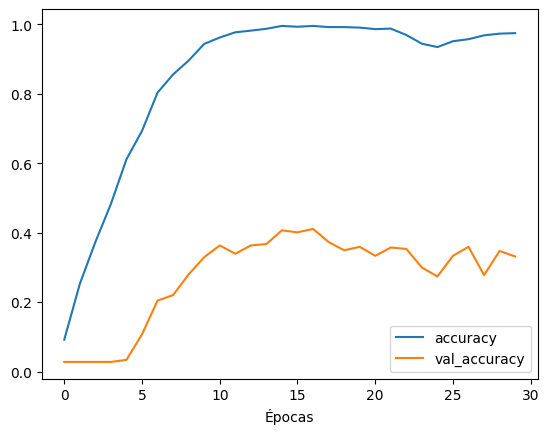

In [ ]:
# Graficar el accuracy y la pérdida
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Épocas')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()


In [ ]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    print("Actual: "+(image_path.split("/")[-1]).split("_")[0])
    print("Predicted: "+classes[np.argmax(pred)])

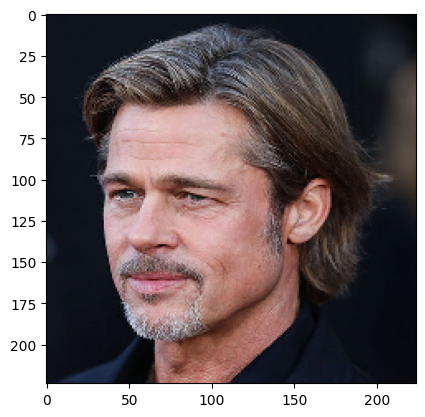

1/1 [==============================] - 0s 21ms/step
Actual: Brad Pitt
Predicted: Roger Federer


In [ ]:
predict_image("/content/drive/MyDrive/face-recognition-dataset/Original Images/Original Images/Brad Pitt/Brad Pitt_102.jpg")

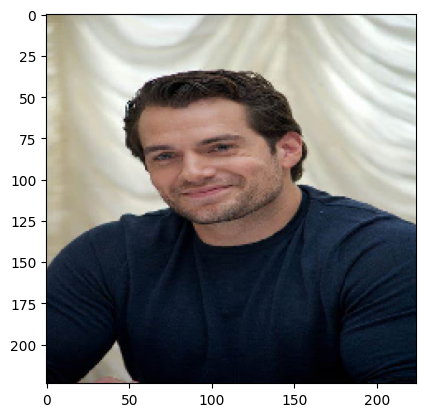

1/1 [==============================] - 0s 19ms/step
Actual: Henry Cavill
Predicted: Vijay Deverakonda


In [ ]:
predict_image("/content/drive/MyDrive/face-recognition-dataset/Original Images/Original Images/Henry Cavill/Henry Cavill_28.jpg")

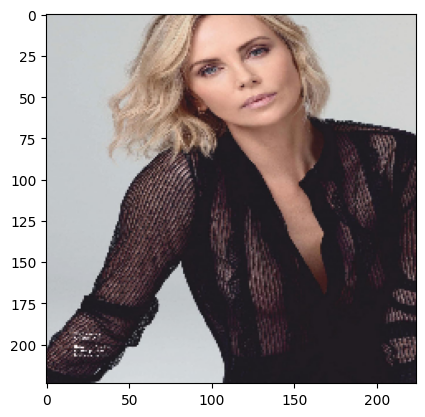

1/1 [==============================] - 0s 31ms/step
Actual: Charlize Theron
Predicted: Virat Kohli


In [ ]:
predict_image("/content/drive/MyDrive/face-recognition-dataset/Original Images/Original Images/Charlize Theron/Charlize Theron_26.jpg")

INTENTO 2 CON CAMBIO DE PARAMETROS Y DIVISION DE DATOS

In [ ]:
train_dir="/content/drive/MyDrive/face-recognition-dataset/Original Images/Original Images"
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32)
classes = list(train_ds.class_indices.keys())

Found 2572 images belonging to 31 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 111, 111, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                        

In [ ]:
history = model.fit(train_ds,epochs= 30, batch_size=32)

Epoch 1/30
81/81 [==============================] - 825s 10s/step - loss: 3.4227 - accuracy: 0.0956
Epoch 2/30
81/81 [==============================] - 42s 524ms/step - loss: 2.6588 - accuracy: 0.2348
Epoch 3/30
81/81 [==============================] - 43s 536ms/step - loss: 2.1357 - accuracy: 0.3546
Epoch 4/30
81/81 [==============================] - 44s 535ms/step - loss: 1.7570 - accuracy: 0.4755
Epoch 5/30
81/81 [==============================] - 45s 556ms/step - loss: 1.4002 - accuracy: 0.5855
Epoch 6/30
81/81 [==============================] - 44s 542ms/step - loss: 1.1066 - accuracy: 0.6722
Epoch 7/30
81/81 [==============================] - 44s 539ms/step - loss: 0.8441 - accuracy: 0.7570
Epoch 8/30
81/81 [==============================] - 44s 539ms/step - loss: 0.6192 - accuracy: 0.8289
Epoch 9/30
81/81 [==============================] - 43s 533ms/step - loss: 0.5023 - accuracy: 0.8515
Epoch 10/30
81/81 [==============================] - 43s 538ms/step - loss: 0.3532 - accurac

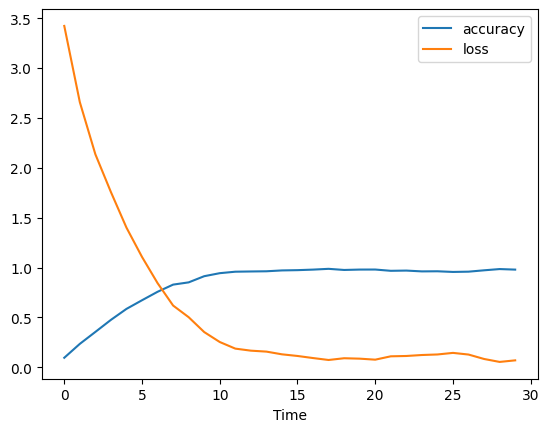

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Time')
plt.legend(['accuracy', 'loss'])
plt.show()

In [ ]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    print("Actual: "+(image_path.split("/")[-1]).split("_")[0])
    print("Predicted: "+classes[np.argmax(pred)])

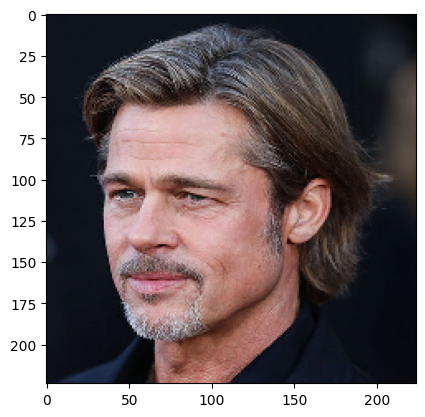

1/1 [==============================] - 1s 533ms/step
Actual: Brad Pitt
Predicted: Brad Pitt


In [ ]:
predict_image("/content/drive/MyDrive/face-recognition-dataset/Original Images/Original Images/Brad Pitt/Brad Pitt_102.jpg")

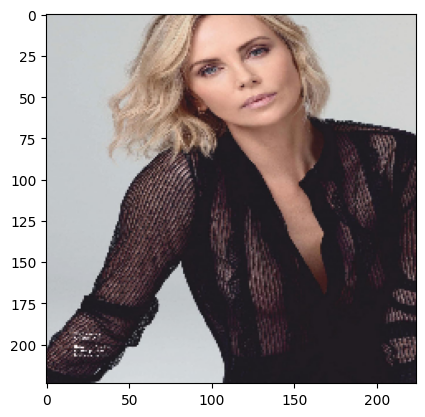

1/1 [==============================] - 0s 23ms/step
Actual: Charlize Theron
Predicted: Charlize Theron


In [ ]:
predict_image("/content/drive/MyDrive/face-recognition-dataset/Original Images/Original Images/Charlize Theron/Charlize Theron_26.jpg")

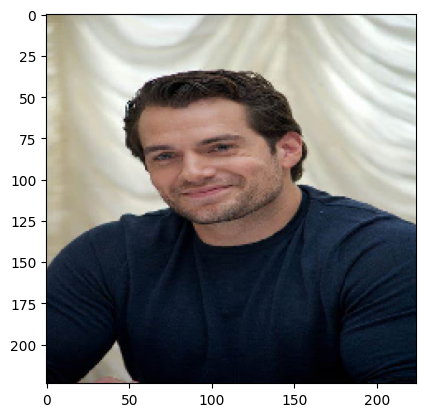

1/1 [==============================] - 0s 26ms/step
Actual: Henry Cavill
Predicted: Henry Cavill


In [ ]:
predict_image("/content/drive/MyDrive/face-recognition-dataset/Original Images/Original Images/Henry Cavill/Henry Cavill_28.jpg")